<a href="https://colab.research.google.com/github/KristynaPijackova/Exercises/blob/main/MPA_MLF_SVM_2students_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [2]:
import pandas as pd
import numpy as np
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


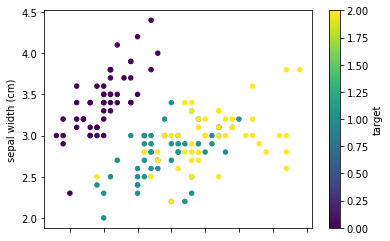

In [55]:
import matplotlib.pyplot as plt 

iris_df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target', colormap='viridis')


Split data into training and testing parts:

In [4]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [5]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9333333333333333

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [6]:
df_iris_smaller = iris_df[iris_df['target'] != 2]
df_iris_smaller

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

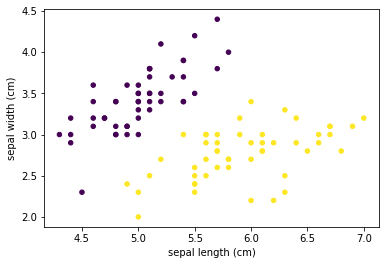

In [93]:
import matplotlib.pyplot as plt 

df_iris_smaller.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='target',
                             colormap='viridis', colorbar=False)


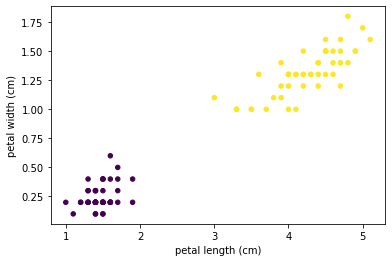

In [94]:
df_iris_smaller.plot.scatter(x='petal length (cm)', y='petal width (cm)', c='target',
                             colormap='viridis', colorbar=False)

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [56]:
X = df_iris_smaller.iloc[:, :2]
y = df_iris_smaller.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(80, 2)
(20, 2)


In [136]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.95

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

In [173]:
support_vectors=SVMmodel.support_vectors_
print(support_vectors.shape)

#Separating line coefficients:
W=SVMmodel.coef_[0]
b=SVMmodel.intercept_[0]


(15, 2)


In [174]:
df_iris_smaller.min(), df_iris_smaller.max()

(sepal length (cm)    4.3
 sepal width (cm)     2.0
 petal length (cm)    1.0
 petal width (cm)     0.1
 target               0.0
 dtype: float64, sepal length (cm)    7.0
 sepal width (cm)     4.4
 petal length (cm)    5.1
 petal width (cm)     1.8
 target               1.0
 dtype: float64)

In [177]:
x_points = np.linspace(4.3, 7, 100)
y_points = -(W[0] / W[1]) * x_points - b / W[1] 

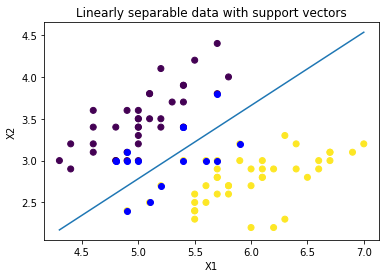

In [178]:
# Plot the support vectors here
# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, cmap='viridis')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='blue')
plt.plot(x_points, y_points)
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

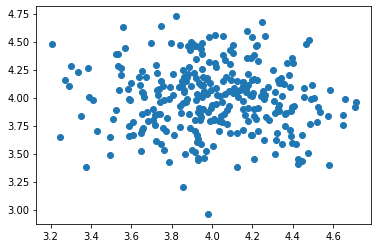

In [179]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

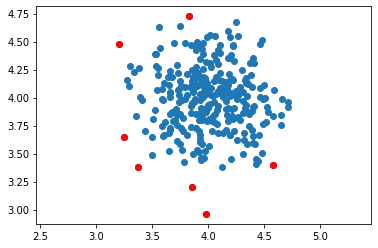

In [188]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

In [208]:
support_vectors=SVMmodelOne.support_vectors_
print(support_vectors.shape)

(10, 2)


(3.130353778593399, 4.789304780827663, 2.8736980074050735, 4.814475546788681)

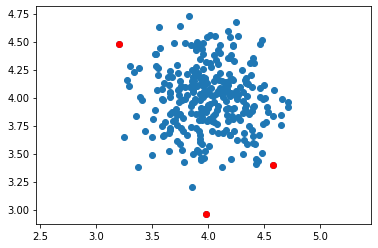

In [209]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
idx = where(scores<=thresh)
values = x[idx]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')


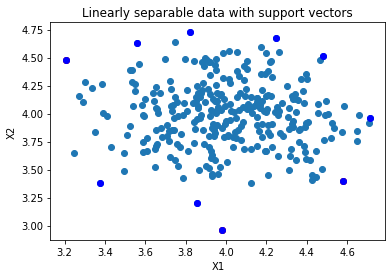

In [210]:
# Plot the support vectors here
# Visualize support vectors
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='blue')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


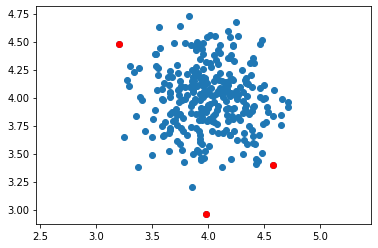

In [211]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()